In [1]:
#Layout

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy

In [4]:
!conda install -c conda-forge geopandas -y

Channels:
 - conda-forge
 - defaults
 - esri
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\taabuosi\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    fiona-1.9.5                |          py311_4        16.7 MB  esri
    folium-0.18.0              |     pyhd8ed1ab_0          77 KB  conda-forge
    geopandas-0.14.4           |     pyhd8ed1ab_0           8 KB  conda-forge
    geopandas-base-0.14.4      |     pyha770c72_0         

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as fm

In [18]:
def plot_standard_map(gdf, title="Map Title", show_legend=True, scale_bar=True, north_arrow=True, 
                      metadata="Data source: GeoPandas", border=True, fig_size=(10, 10), dpi=300):
    fig, ax = plt.subplots(figsize=fig_size, dpi=dpi)
    gdf.plot(ax=ax, color="lightblue", edgecolor="black")
    ax.set_title(title, fontsize=16, fontweight="bold", loc="center")
    if border:
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(True)
    if show_legend:
        # Example: creating a legend based on geometry types or attributes
        legend = ax.legend(["Example Legend"], loc="upper right", fontsize=10)
        ax.add_artist(legend)
    if north_arrow:
        ax.annotate('', xy=(0.05, 0.95), xytext=(0.05, 0.85),
                    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=2))
        ax.text(0.05, 0.9, 'N', transform=ax.transAxes, fontsize=12, fontweight="bold", color='black')
    if scale_bar:
        # Positioning scale bar at the bottom-left corner
        scale_ax = inset_axes(ax, width="30%", height="3%", loc="lower left")
        scale_ax.axis('off')
        scale_ax.add_patch(mpatches.Rectangle((0, 0), 1, 0.1, facecolor="black"))
        scale_ax.text(0.5, 0.5, "Scale Bar", color="white", ha="center", va="center", fontsize=10)
    ax.text(0.99, 0.01, metadata, transform=ax.transAxes, ha='right', va='bottom', fontsize=8, color='black')
    plt.tight_layout(pad=3.0)
    plt.show()

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\taabuosi\AppData\Local\Temp\ipykernel_12040\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\taabuosi\AppData\Local\Temp\ipykernel_12040\2200358993.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


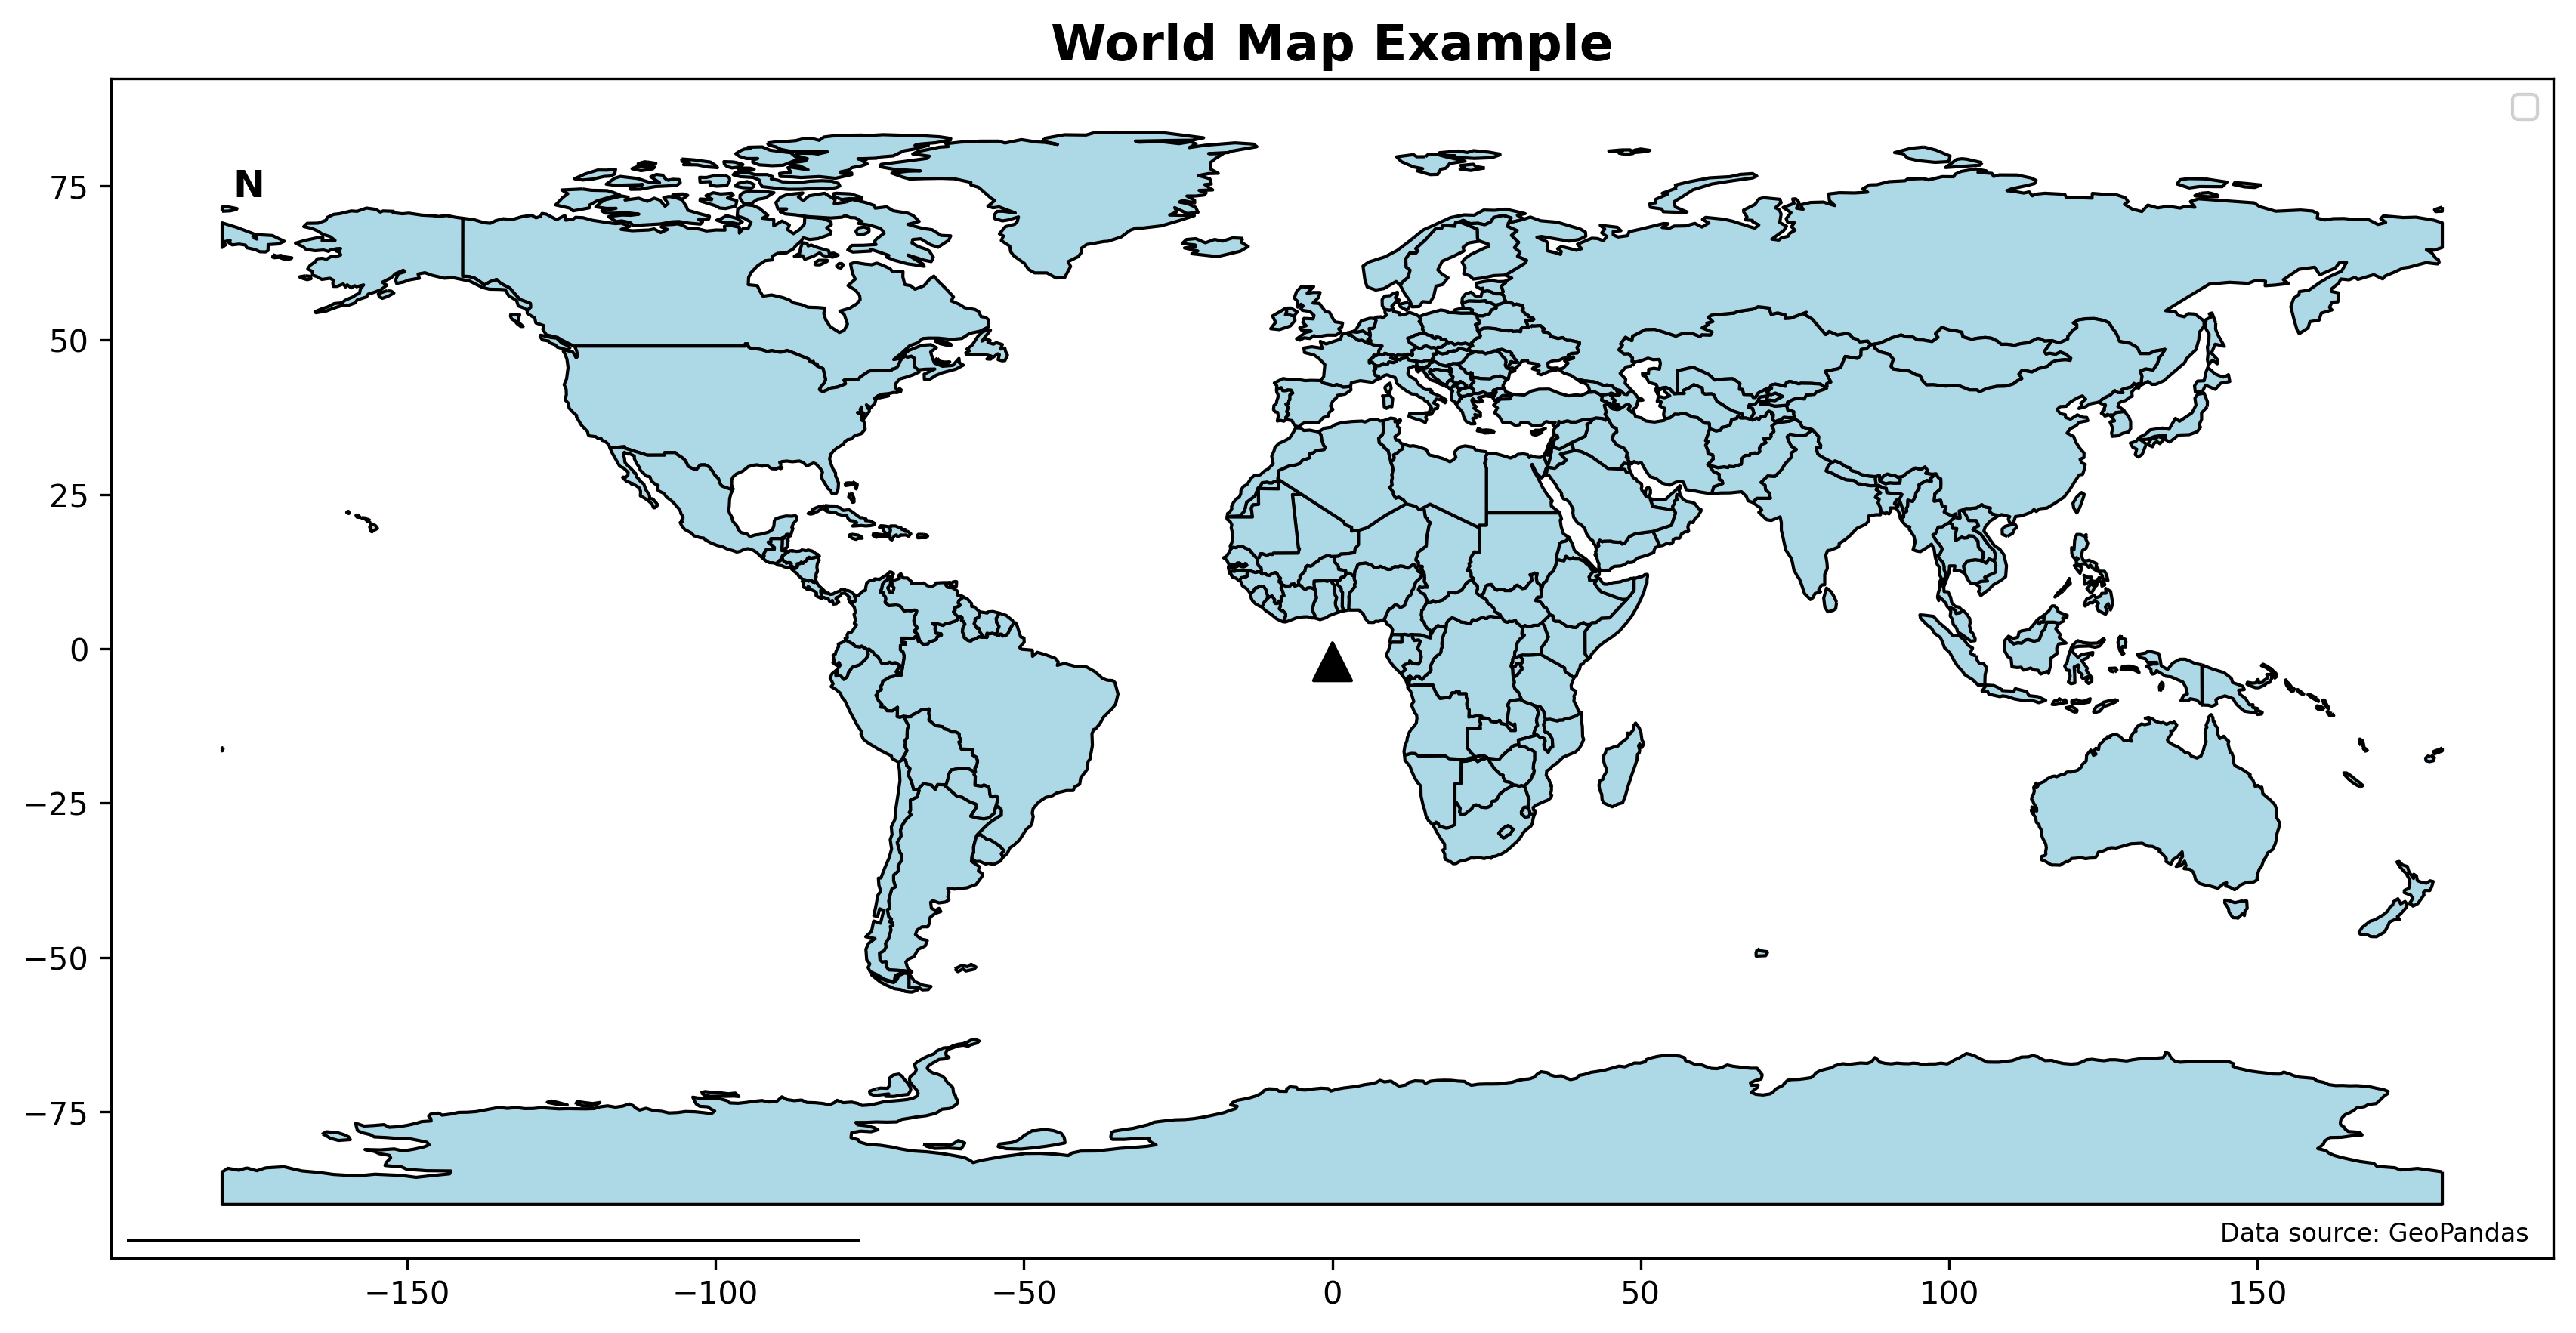

In [20]:
plot_standard_map(
    gdf=world,
    title="World Map Example",
    show_legend=True,
    scale_bar=True,
    north_arrow=True,
    metadata="Data source: GeoPandas",
    border=True,
    fig_size=(12, 12),
    dpi=300
)

In [21]:
gdb_path = r"C:\Users\taabuosi\Downloads\USA (1)"
places = r"C:\Users\taabuosi\Downloads\USA (1)\places.shp"